In [11]:
# Mechanical Engineering Analysis Using Python

#This demonstrates applied mechanical engineering analysis using Python,
#including energy, thermal, and stress-based design evaluations.


In [13]:
## 1. Structural Stress Analysis
#Objective: Evaluate stress under varying loads and check against allowable limits.

In [5]:
import numpy as np
# Force data from test (N)
forces = np.array([500,1000,1500,2000,2500])
#cross sectional area (m^2)
area = 0.004
#Stress calculation
stress = forces/area
print("Stress Values (Pa):")
print(stress)


Stress Values (Pa)
[125000. 250000. 375000. 500000. 625000.]


In [6]:
#convert stress to MPa
stress_MPa = stress/1e6
print("Stress Values (MPa):")
print (stress_MPa)



Stress Values (MPa):
[0.125 0.25  0.375 0.5   0.625]


In [7]:
#Allowable Stress (MPa)
allowable_stress = 250
#Safety Check
safe_design = stress_MPa < allowable_stress
print("Safe Design Allowable Stress:")
print(safe_design)



Safe Design Allowable Stress:
[ True  True  True  True  True]


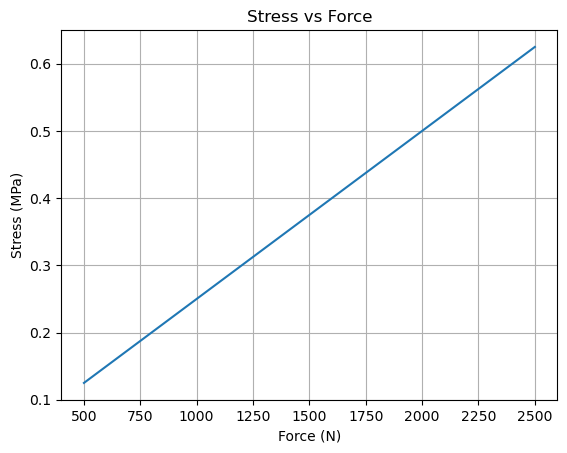

In [9]:
import matplotlib.pyplot as plt
plt.plot(forces,stress_MPa)
plt.xlabel("Force (N)")
plt.ylabel("Stress (MPa)")
plt.title("Stress vs Force")
plt.grid(True)
plt.show()

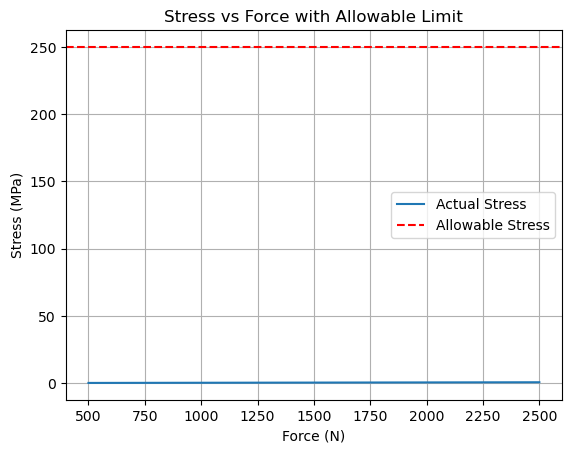

In [10]:
plt.plot(forces, stress_MPa, label="Actual Stress")
plt.axhline(y=allowable_stress, color='r', linestyle='--', label="Allowable Stress")

plt.xlabel("Force (N)")
plt.ylabel("Stress (MPa)")
plt.title("Stress vs Force with Allowable Limit")
plt.legend()
plt.grid(True)

plt.show()


In [2]:
import numpy as np
# Load Cases
forces = np.array([2000,4000,6000,8000,10000])
# Cross sectional area (m^2)
area = 0.004
# Stress calculation
stress = forces/area
# convert to MPa
stress_MPa = stress/1e6
stress_MPa = np.round(stress_MPa,2)
print("Forces (N):", forces)
print("Stress (MPa):", stress_MPa)


Forces (N): [ 2000  4000  6000  8000 10000]
Stress (MPa): [0.5 1.  1.5 2.  2.5]


In [4]:
# Allowable Stress
allowable_stress = 250
# Safety check
safe = stress_MPa < allowable_stress
print("Safe for each load case:")
print(safe)


Safe for each load case:
[ True  True  True  True  True]


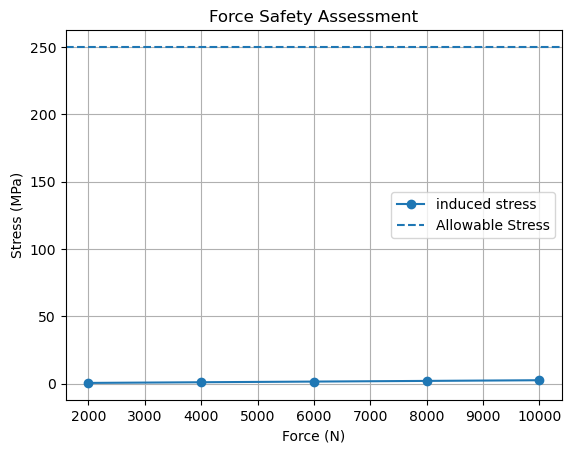

In [6]:
import matplotlib.pyplot as plt
plt.plot(forces,stress_MPa, marker='o', label='induced stress')
plt.axhline(y=allowable_stress, linestyle="--", label="Allowable Stress")
plt.xlabel("Force (N)")
plt.ylabel("Stress (MPa)")
plt.title("Force Safety Assessment")
plt.legend()
plt.grid()
plt.show()

In [10]:
#Estimate Failure Load
failure_force = allowable_stress * 1e6 * area
failure_force_KN = failure_force/1000
print("Estimated Failure Load:", failure_force_KN)


Estimated Failure Load: 1000.0


In [14]:
# 2. Thermal & Parametric Analysis
#Objective: Analyse temperature rise under different operating scenarios.


In [20]:
import numpy as np
#Time in Seconds
time = np.array([0,60,120,180,240,300])
#Different heating secnarios
heating_rates = {
    "Low heating":0.2,
    "Normal heating":0.35,
    "High heating":0.5
}
initial_temp = 25
temperature_profile = {}
for case, rate in heating_rates.items():
    temperature_profile[case] = initial_temp + rate*time
print(temperature_profile)
allowable_temp = 120
safety_factors = {}
for case,temp in temperature_profile.items():
    safety_factors[case]= allowable_temp/temp
print(safety_factors)





    

{'Low heating': array([25., 37., 49., 61., 73., 85.]), 'Normal heating': array([ 25.,  46.,  67.,  88., 109., 130.]), 'High heating': array([ 25.,  55.,  85., 115., 145., 175.])}
{'Low heating': array([4.8       , 3.24324324, 2.44897959, 1.96721311, 1.64383562,
       1.41176471]), 'Normal heating': array([4.8       , 2.60869565, 1.79104478, 1.36363636, 1.10091743,
       0.92307692]), 'High heating': array([4.8       , 2.18181818, 1.41176471, 1.04347826, 0.82758621,
       0.68571429])}


In [21]:
for case, temp in temperature_profile.items():
    if np.any(temp> allowable_temp):
        print(case,":Not safe - cooling or redesigning is required")
    else:
        print(case,":Safe under current conditions")
        

Low heating :Safe under current conditions
Normal heating :Not safe - cooling or redesigning is required
High heating :Not safe - cooling or redesigning is required


<function matplotlib.pyplot.show(close=None, block=None)>

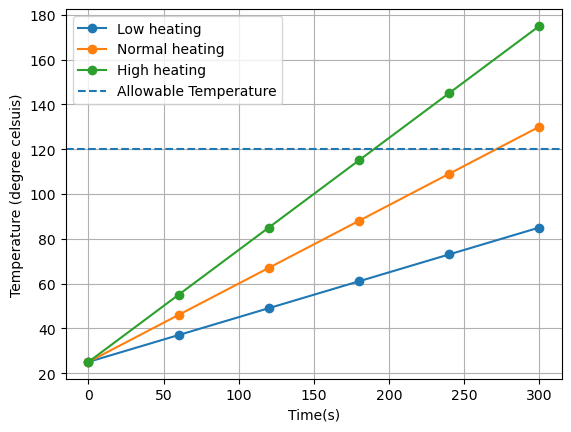

In [25]:
import matplotlib.pyplot as plt
for case, temp in temperature_profile.items():
    plt.plot(time,temp, marker = 'o',label=case)

plt.axhline(y=allowable_temp, linestyle='--', label = "Allowable Temperature")
plt.xlabel("Time(s)")
plt.ylabel("Temperature (degree celsuis)")
plt.legend()
plt.grid(True)
plt.show



In [26]:
for case, rate in heating_rates.items():
    time_to_limit = (allowable_temp - initial_temp) / rate
    print(f"{case}-Estimated time to reach limit:{int(time_to_limit)}s")


Low heating-Estimated time to reach limit:475s
Normal heating-Estimated time to reach limit:271s
High heating-Estimated time to reach limit:190s


In [15]:
# 3. EV Energy Consumption & Efficiency Analysis
#Objective: Assess how speed affects energy consumption and driving range.



In [3]:
import numpy as np

# Vehicle / environment parameters (reasonable small-EV / micro-vehicle values)
m = 500          # mass (kg)
g = 9.81         # gravity (m/s^2)
Crr = 0.012      # rolling resistance coefficient (-)
rho = 1.225      # air density (kg/m^3)
Cd = 0.35        # drag coefficient (-)
A = 1.2          # frontal area (m^2)
drivetrain_eff = 0.85  # overall drivetrain efficiency (-)

# Speed sweep (m/s) => 10 to 70 km/h
v = np.linspace(10/3.6, 70/3.6, 61)


In [4]:
# Resistive forces
F_roll = Crr * m * g
F_aero = 0.5 * rho * Cd * A * v**2
F_total = F_roll + F_aero

# Tractive power at wheels (W)
P_wheels = F_total * v

# Electrical power drawn from battery (W)
P_elec = P_wheels / drivetrain_eff

# Energy per km (Wh/km):
# Energy per distance = Power / speed (J/m), convert to Wh/km
# Wh/km = (P_elec / v) * (1000 m/km) / 3600 (J/Wh)
Wh_per_km = (P_elec / v) * (1000 / 3600)

print("Min Wh/km:", round(Wh_per_km.min(), 1))
print("Max Wh/km:", round(Wh_per_km.max(), 1))


Min Wh/km: 19.9
Max Wh/km: 51.0


In [5]:
idx_best = np.argmin(Wh_per_km)
best_speed_ms = v[idx_best]
best_speed_kmh = best_speed_ms * 3.6
best_consumption = Wh_per_km[idx_best]

print("Most efficient speed:", round(best_speed_kmh, 1), "km/h")
print("Consumption at best speed:", round(best_consumption, 1), "Wh/km")


Most efficient speed: 10.0 km/h
Consumption at best speed: 19.9 Wh/km


In [6]:
battery_kWh = 6.1   # example battery size (kWh) for a small EV/micro-vehicle
usable_fraction = 0.9
usable_Wh = battery_kWh * 1000 * usable_fraction

range_km_best = usable_Wh / best_consumption
print("Estimated range at best speed:", round(range_km_best, 1), "km")

# Risk check at 60 km/h
target_speed_kmh = 60
target_speed_ms = target_speed_kmh / 3.6
idx_target = np.argmin(np.abs(v - target_speed_ms))
consumption_target = Wh_per_km[idx_target]
range_km_target = usable_Wh / consumption_target

print("At 60 km/h consumption:", round(consumption_target, 1), "Wh/km")
print("At 60 km/h range:", round(range_km_target, 1), "km")

if range_km_target < 50:
    print("RANGE RISK: At 60 km/h, estimated range is below 50 km – consider larger battery or speed management.")
else:
    print("Range OK: At 60 km/h, estimated range meets 50 km threshold.")


Estimated range at best speed: 276.1 km
At 60 km/h consumption: 42.6 Wh/km
At 60 km/h range: 128.9 km
Range OK: At 60 km/h, estimated range meets 50 km threshold.


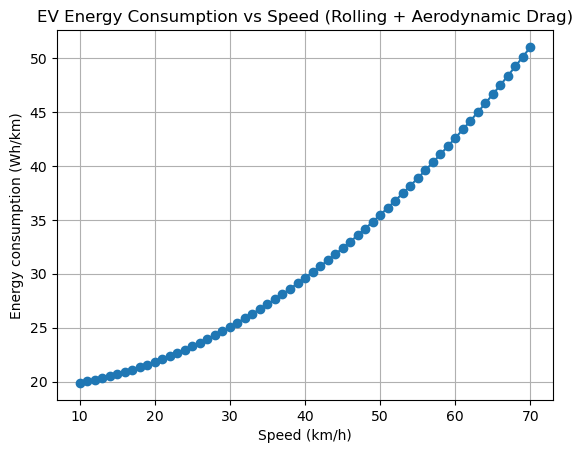

In [7]:
import matplotlib.pyplot as plt

plt.plot(v * 3.6, Wh_per_km, marker='o')
plt.xlabel("Speed (km/h)")
plt.ylabel("Energy consumption (Wh/km)")
plt.title("EV Energy Consumption vs Speed (Rolling + Aerodynamic Drag)")
plt.grid(True)
plt.show()
